<a href="https://colab.research.google.com/github/sjmama/sem/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # csv file
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성
from sklearn.model_selection import train_test_split # train/test set 생성
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kc_house_data.csv")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


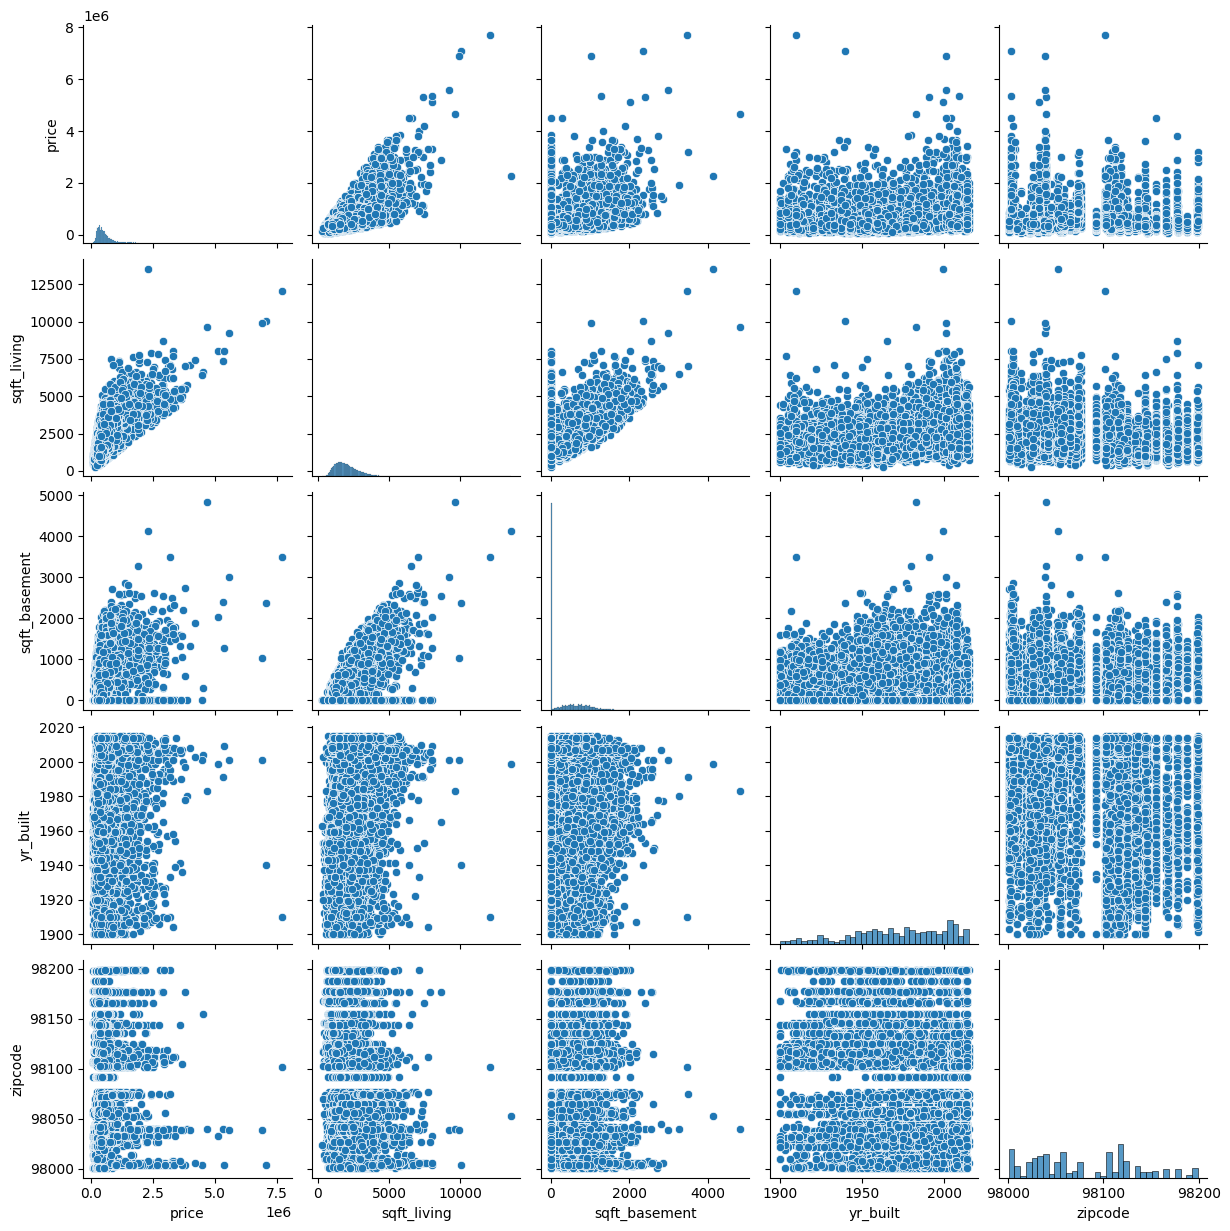

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

sns.pairplot(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()

In [14]:
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['price']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
# df_train, df_test = train_test_split(df, test_size = 0.3)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [15]:
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))
print(len(x_train)/len(x_test))

train data 개수:  15129
test data 개수:  6484
2.333281924737816


In [16]:
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train)

LinearRegression()

In [17]:
y_predict = mreg.predict(x_test)

In [20]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.70
테스트셋 R-Square: 0.71


In [21]:
print(mreg.intercept_)

# 모델의 회귀계수 확인
print(mreg.coef_)

[7807469.25529949]
[[-3.98096030e+04  4.59008410e+04  1.20263670e+02  2.91655238e-02
   3.98886901e+03  6.20223103e+05  4.99467657e+04  2.37138340e+04
   9.59469071e+04  7.60918644e+01  4.41718051e+01 -2.69857448e+03
   2.40316117e+01 -5.98676999e+02  6.02796723e+05 -2.19946656e+05
   1.15508548e+01 -3.65256768e-01]]


In [22]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2036.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:13:40   Log-Likelihood:            -2.0663e+05
No. Observations:               15129   AIC:                         4.133e+05
Df Residuals:                   15111   BIC:                         4.134e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.807e+06   3.59e+06      2.177      0.029    7.79e+05    1.48e+07
bedrooms      -3.981e+04   2283.235    -17.436      0.000   -4.43e+04   -3.53e+04
bathrooms       4.59e+04   3993.781     11.493      0.000    3.81e+04    5.37e+04
sqft_living     120.2615      2.788     43.131      0.000     114.796     125.727
sqft_lot          0.0292      0.065      0.452      0.652      -0.097       0.156
floors         3988.8690   4410.003      0.905      0.366   -4655.270    1.26e+04
waterfront     6.202e+05   2.17e+04     28.523      0.000    5.78e+05    6.63e+05
view           4.995e+04   2664.077     18.748      0.000    4.47e+04    5.52e+04
condition      2.371e+04   2888.996      8.208      0.000    1.81e+04    2.94e+04
grade          9.595e+04   2654.939     36.139      0.000    9.07e+04    1.01e+05
sqft_above       76.0940      2.777     27.403      0.000      70.651      81.537
sqft_basement    44.1740      3.250     13.593      0.000      37.804      50.544
yr_built      -2698.5745     89.022    -30.314      0.000   -2873.069   -2524.080
yr_renovated     24.0316      4.414      5.444      0.000      15.380      32.684
zipcode        -598.6770     40.383    -14.825      0.000    -677.833    -519.521
lat            6.028e+05   1.32e+04     45.708      0.000    5.77e+05    6.29e+05
long          -2.199e+05   1.61e+04    -13.677      0.000   -2.51e+05   -1.88e+05
sqft_living15    11.5509      4.245      2.721      0.007       3.230      19.872
sqft_lot15       -0.3653      0.091     -4.024      0.000      -0.543      -0.187
==============================================================================
Omnibus:                    13401.435   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1510540.214
Skew:                           3.779   Prob(JB):                         0.00
Kurtosis:                      51.365   Cond. No.                     8.93e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
# 다항회귀 불러오기
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 변환
poly_m = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_m.fit_transform(x_train)

# 다항 회귀모델 생성
mreg_poly = LinearRegression(fit_intercept=True)

# 다항회귀 학습
mreg_poly.fit(x_train_poly, y_train)

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

In [24]:
# 모델의 상수값 확인
print(mreg_poly.intercept_)

# 모델의 회귀계수 확인
print(mreg_poly.coef_)

[2.56943658e+10]
[[ 6.51911677e+06 -1.00385237e+07  5.43493476e+04 -2.31171737e+02
  -4.20361719e+07  6.00960156e+07 -6.20963710e+05  4.97086769e+06
  -1.29898290e+07 -4.05827801e+03 -6.56404960e+04 -8.42727340e+04
   2.81792554e+04 -5.28946624e+05  1.00058127e+08  3.27449151e+07
  -1.76414915e+04  6.20106237e+02  7.84653109e+02 -3.51997976e+03
  -4.84456298e+02  6.73022041e-02  2.14633569e+04 -9.71055141e+03
   2.94401180e+03 -3.11291925e+03  4.47863423e+03  4.51269642e+02
   4.65544685e+02 -1.10550022e+02 -1.03434435e+01  5.02933525e+01
  -2.38859822e+04  8.27099187e+04  8.44403351e+00  6.23019077e-02
  -8.76794471e+03  2.88205678e+01 -3.99601959e-01 -3.71008437e+04
   1.39859970e+04  1.37959394e+04 -1.12938784e+04  1.14383551e+04
   1.85251269e+01  9.88508458e+00  3.84939710e+02 -6.59669006e+00
  -6.95015887e+01  7.18668105e+04 -1.03811274e+05 -1.42959960e+01
   1.37614550e-01  1.37231865e+03  6.29743261e+03  8.45040454e+00
   1.13962066e+02 -1.10052238e+01  1.68650036e+00  1.289917

In [25]:
print("학습셋 R-Square: {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))

학습셋 R-Square: 0.84
테스트셋 R-Square: 0.79


In [26]:
# Ridge 설치
from sklearn.linear_model import Ridge

# alpha 별 모델 생성
ridge = Ridge().fit(x_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(x_train, y_train)
ridge100 = Ridge(alpha=100).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("ridge_train R2: {:.3f}".format(ridge.score(x_train, y_train)))
print("ridge_test R2: {:.3f}".format(ridge.score(x_test, y_test)))

print("ridge001_train R2: {:.3f}".format(ridge001.score(x_train, y_train)))
print("ridge001_test R2: {:.3f}".format(ridge001.score(x_test, y_test)))

print("ridge100_train R2: {:.3f}".format(ridge100.score(x_train, y_train)))
print("ridge100_test R2: {:.3f}".format(ridge100.score(x_test, y_test)))

ridge_train R2: 0.696
ridge_test R2: 0.706
ridge001_train R2: 0.696
ridge001_test R2: 0.706
ridge100_train R2: 0.688
ridge100_test R2: 0.700


In [27]:
# Lasso 설치
from sklearn.linear_model import Lasso

# alpha 별 모델 생성
lasso = Lasso().fit(x_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)
lasso10000 = Lasso(alpha=10000).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("lasso_train R2: {:.3f}".format(lasso.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(lasso.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso.coef_ !=0))

print("lasso001_train R2: {:.3f}".format(lasso001.score(x_train, y_train)))
print("lasso001_test R2: {:.3f}".format(lasso001.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso001.coef_ !=0))

print("lasso10000_train R2: {:.3f}".format(lasso10000.score(x_train, y_train)))
print("lasso10000_test R2: {:.3f}".format(lasso10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso10000.coef_ !=0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.933e+14, tolerance: 2.127e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.933e+14, tolerance: 2.127e+11
  model = cd_fast.enet_coordinate_descent(


lasso_train R2: 0.696
lasso_test R2: 0.706
num_of_IV: 18
lasso001_train R2: 0.696
lasso001_test R2: 0.706
num_of_IV: 18
lasso10000_train R2: 0.627
lasso10000_test R2: 0.635
num_of_IV: 13


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.912e+14, tolerance: 2.127e+11
  model = cd_fast.enet_coordinate_descent(


In [28]:
# ElasticNet 설치
from sklearn.linear_model import ElasticNet

# alpha 별 모델 생성
elast = ElasticNet().fit(x_train, y_train)
elast001 = ElasticNet(alpha=100, l1_ratio = 0.1).fit(x_train, y_train)
elast10000 = ElasticNet(alpha=10000, l1_ratio = 1).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("elast_train R2: {:.3f}".format(elast.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(elast.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast.coef_ !=0))

print("elast001_train R2: {:.3f}".format(elast001.score(x_train, y_train)))
print("elast001_test R2: {:.3f}".format(elast001.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast001.coef_ !=0))

print("elast10000_train R2: {:.3f}".format(elast10000.score(x_train, y_train)))
print("elast10000_test R2: {:.3f}".format(elast10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast10000.coef_ !=0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.318e+14, tolerance: 2.127e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.871e+14, tolerance: 2.127e+11
  model = cd_fast.enet_coordinate_descent(


elast_train R2: 0.618
lasso_test R2: 0.624
num_of_IV: 18
elast001_train R2: 0.545
elast001_test R2: 0.543
num_of_IV: 18
elast10000_train R2: 0.627
elast10000_test R2: 0.635
num_of_IV: 13


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.912e+14, tolerance: 2.127e+11
  model = cd_fast.enet_coordinate_descent(
